In [1]:
%load_ext autoreload
%autoreload 2

# The deformation module library is not automatically installed yet, we need to add its path manually
import sys
sys.path.append("../../")

import torch
import numpy as np
import matplotlib.pyplot as plt

import implicitmodules.torch as dm

torch.manual_seed(1337)
torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
d = 2

nb_pts_trans = 10
nb_pts_trans2 = 5
nb_pts_silent = 25

gd_trans = torch.rand(nb_pts_trans, d, requires_grad=True)
gd_trans2 = torch.rand(nb_pts_trans2, d, requires_grad=True)
gd_silent = torch.rand(nb_pts_silent, d, requires_grad=True)

mom_trans = torch.rand(nb_pts_trans, d, requires_grad=True)
mom_trans2 = torch.rand(nb_pts_trans2, d, requires_grad=True)
mom_silent = torch.rand(nb_pts_silent, d, requires_grad=True)

In [5]:
sigma = 0.1

trans = dm.DeformationModules.Translations(2, nb_pts_trans, sigma, gd=gd_trans, cotan=mom_trans)
trans2 = dm.DeformationModules.Translations(2, nb_pts_trans2, sigma, gd=gd_trans2, cotan=mom_trans2)
silent = dm.DeformationModules.SilentLandmarks(2, nb_pts_silent, gd=gd_silent, cotan=mom_silent)

compound = dm.DeformationModules.CompoundModule([trans, trans2, silent])

In [6]:
hamiltonian = dm.HamiltonianDynamic.Hamiltonian(compound)

In [7]:
out = dm.HamiltonianDynamic.shoot(hamiltonian, 10, 'torch_euler')

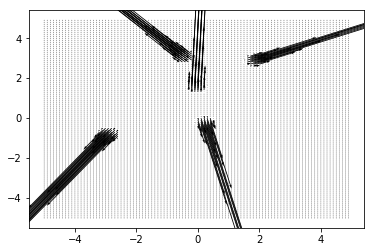

In [10]:
nx, ny = 100, 100
sx, sy = 10, 10
x, y = torch.meshgrid([torch.arange(0, nx), torch.arange(0, ny)])
x = sx*(x.type(torch.get_default_dtype())/nx - 0.5)
y = sy*(y.type(torch.get_default_dtype())/ny - 0.5)
u, v = dm.Utilities.vec2grid(compound(dm.Utilities.grid2vec(x, y)), nx, ny)

plt.quiver(x.numpy(), y.numpy(), u.detach().numpy(), v.detach().numpy())
plt.show()